In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def alpha_k(x, k):
    return np.mean((x - np.mean(x))**k)

In [3]:
def bootstrap_variance(x, B):
    """Estimate the bootstrap variance for T_n using B replicates"""
    n = len(x)
    Tn = np.zeros(B)
    for i in range(B):
        xs = x[np.random.choice(n, n)]
        Tn[i] = np.mean(xs)**2
    return np.std(Tn)**2

In [4]:
def wasserman(x):
    n = len(x)
    vboot = 4 * (np.mean(x)**2) * (alpha_k(x, 2))/n
    vboot += 4 * np.mean(x) * alpha_k(x, 3) / (n**2)
    vboot += alpha_k(x, 4) / (n**3)
    return vboot

In [5]:
def alternate(x):
    n = len(x)
    a2 = alpha_k(x, 2)
    a3 = alpha_k(x, 3)
    a4 = alpha_k(x, 4)
    vboot = 4 * (np.mean(x)**2) * (a2)/n
    vboot += 4 * np.mean(x) * a3 / (n**2)
    vboot += (a4 + (2*n - 3)*a2**2) / (n**3)
    return vboot

In [17]:
nlist = [3, 5, 7, 9]

was_boot = np.zeros(len(nlist))
alt_boot = np.zeros(len(nlist))
ref_boot = np.zeros(len(nlist))


x = np.random.randn(n)

for i in range(len(nlist)):
    n = nlist[i] 
    was_boot[i] = wasserman(x)
    alt_boot[i] = alternate(x)
    ref_boot[i] = bootstrap_variance(x, int(1e5))
    print(n)

3
5
7
9


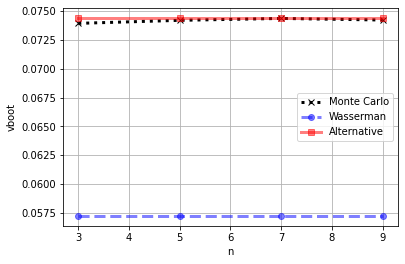

In [18]:
plt.figure()
plt.plot(nlist, ref_boot, 'k:x', lw=3, label='Monte Carlo')
plt.plot(nlist, was_boot, 'b--o', lw=3, alpha=0.5, label='Wasserman')
plt.plot(nlist, alt_boot, 'r-s', lw=3, alpha=0.5, label='Alternative')
plt.xlabel(r'n')
plt.ylabel(r'vboot')
plt.grid()
plt.legend();